In [8]:
import pandas as pd
file_path="E:/세종사이버/2023 봄/웹데이터/chipotle.tsv"
chipo=pd.read_csv(file_path, sep="\t")
print(chipo.shape) 
print(chipo.info()) 
chipo.head()
chipo.head(100)
chipo.index
chipo.columns

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [14]:
chipo.columns = ['주문번호', '수량', '상품', '상세선택옵션', '가격']

In [15]:
chipo.describe()

,주문번호,수량
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [16]:
item_quantity=chipo.groupby('상품')['수량'].sum()
item_quantity
item_count=chipo['상품'].value_counts()
item_count
item_count[0:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: 상품, dtype: int64

In [18]:
item_count = chipo['상품'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [19]:
print(len(chipo['주문번호'].unique()))
print(len(chipo['상품'].unique()))
chipo.loc[:, ['상품', '가격']]

1834
50


,상품,가격
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98
...,...,...
4617,Steak Burrito,$11.75
4618,Steak Burrito,$11.75
4619,Chicken Salad Bowl,$11.25
4620,Chicken Salad Bowl,$8.75


In [ ]:
실습 2번

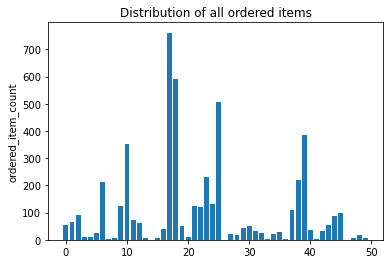

In [23]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align="center")
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered items')
plt.show()

In [24]:
chipo['가격'].head()
chipo['가격'] = chipo['가격'].apply(lambda x: float(x[1:]))
chipo.describe()
chipo.groupby('주문번호')['가격'].sum().mean()
chipo_orderid_group = chipo.groupby('주문번호').sum()
results = chipo_orderid_group[chipo_orderid_group.가격 >= 10]
print(results[:10])
print(results.index.values)

      수량     가격
주문번호           
1      4  11.56
2      2  16.98
3      2  12.67
4      2  21.00
5      2  13.70
6      2  17.50
7      2  15.70
8      2  10.88
9      3  10.67
10     2  13.20
[   1    2    3 ... 1832 1833 1834]


In [25]:
chipo_one_item=chipo[chipo.수량 == 1]
price_per_item=chipo_one_item.groupby('상품').min()
price_per_item.sort_values(by="가격", ascending=False)[:10]

,주문번호,수량,상세선택옵션,가격
상품,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


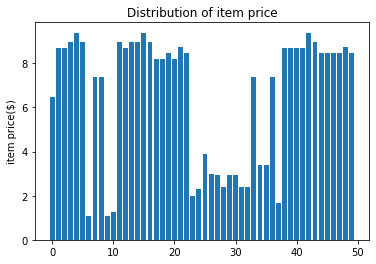

In [26]:
item_name_list=price_per_item.index.tolist()
x_pos=np.arange(len(item_name_list))
item_price=price_per_item['가격'].tolist()
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

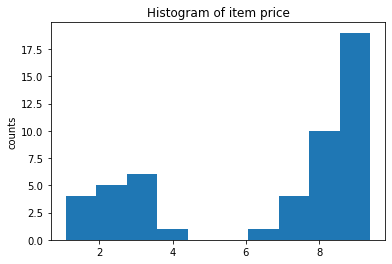

In [27]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()